# Model evaluation plots

Once the model is tuned it is useful to characterize the training process. We will encounter several variants of model evaluation plots throughout these materials and they worth the extra bit of effort, because without them the process of obtaining the hyperparameter estimates is a black box. They are generally used to summarize **how well your model generalizes to unseen data**. Two commonly used variants are learning curves and validation curves each providing insight into the learning and validation parts of the process.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import learning_curve
from sklearn.datasets import load_iris, load_digits
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import ShuffleSplit
plt.style.use('seaborn')

In [2]:
def plot_learning_curve(estimator, ax=None, save_as=None, cv=5):
    """
    an sklearn estimator 
    """

    if not ax:
        fig = plt.figure()
        ax = fig.add_subplot(111)

    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    train_sizes=np.linspace(.1, 1.0, 6)
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y,
                                                            cv=cv, n_jobs=-1,
                                                            train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    ax.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    ax.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    ax.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    ax.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    ## axes and lables
    buff = 0.05
    xmin,xmax = ax.get_xlim()
    ymin,ymax = ax.get_ylim()
    xbuff = buff * (xmax - xmin)
    ybuff = buff * (ymax - ymin)
    ax.set_xlim(xmin-xbuff,xmax+xbuff)
    ax.set_ylim(ymin-ybuff,ymax+ybuff)
    ax.set_xlabel("Training examples")
    ax.set_ylabel("Score")
    
    ax.legend(loc="best")
    
    ## save figure if file name provided
    if save_as:
        plt.savefig(save_as)

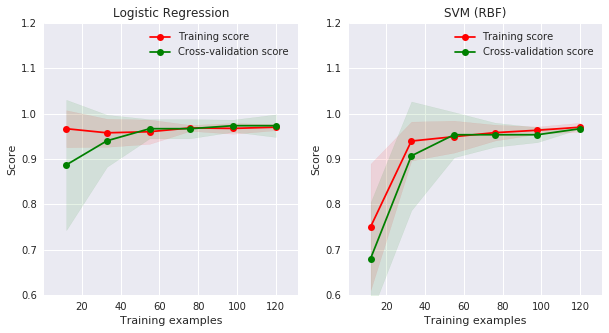

In [3]:
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
    
np.random.seed(0)
iris = load_iris()
X, y = iris.data, iris.target

indices = np.arange(y.shape[0])
np.random.shuffle(indices)
X, y = X[indices], y[indices]

model1 = LogisticRegression(multi_class='auto',solver='lbfgs')
plot_learning_curve(model1, ax=ax1)

model2 = SVC(kernel='rbf',C=5.0, gamma=0.01)
plot_learning_curve(model2,ax=ax2)

ax1.set_title("Logistic Regression")
ax2.set_title("SVM (RBF)")

for ax in [ax1,ax2]:
    ax.set_ylim((0.6,1.2))
    
plt.show()

How well a model performs can be decomposed as bias, variance and noise. The bias of a model is its average error when a model is subjected to different training sets and it comes from the underlying model assumptions. The variance of a model is reflective of how sensitive it is to variations in the training data. The learning curve help us discover if our error is weighted toward bias or variance. The logistic regression plot illustrates high bias and the SVM shows high variance, but both converge to reasonable scores.

### When a model exhibits high bias

High bias is associated with under-fitting, or trying to fit an inflexible model to flexible data. Linear Regression and Logistic Regression are models that make strong assumptions about the target function, which implies high bias.

* **Add more features** such as engineered features or those derived from additional data
* **Use a more sophisticated model**
* **Decrease regularization** by tunning the regularization hyperparameter

### When a model exhibits high variance

High variance is associated with over-fitting, or models that attempt to conform to all data points. Decision Trees and KNNs are examples of high variance models.

* **Use fewer features** techniques like *variance thresholding*, *ANOVA (SelectKBest)*, *manifold learning*, and *matrix decomposition* can be used.
* **Use a simpler model** because the model may be overly complex for a relatively simple signal in the data
* **Use more training samples**
* **Increase regularization** by tuning the regularization hyperparameter